In [3]:
!pip install stable-baselines3[extra]

In [ ]:
pip install shimmy>=2.0

In [8]:
!pip install gymnasium

In [5]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [6]:
import torch
print(f"CUDA Available: {torch.cuda.is_available()}")
print(f"CUDA Version: {torch.version.cuda}")
print(f"GPU Name: {torch.cuda.get_device_name(0) if torch.cuda.is_available() else 'No GPU found'}")


CUDA Available: True
CUDA Version: 12.1
GPU Name: NVIDIA GeForce RTX 3060 Laptop GPU


## 1. Import Dependencies

In [61]:
import os #os library for defining paths
import gymnasium as gym #openAI gym. Allows to build environments and work with preexisting environments easily. 
from stable_baselines3 import PPO #An Algorithm 
from stable_baselines3.common.vec_env import DummyVecEnv #Train model at multiple envs at same time, 
#vectorizing envs.
from stable_baselines3.common.evaluation import evaluate_policy #Evaluate - Avg reward over 
#certain no of episodes, std dev
import cv2
from PIL import Image
from IPython.display import display, clear_output

## 2. Load Environment

In [62]:
env = gym.make("CartPole-v1", render_mode="rgb_array")

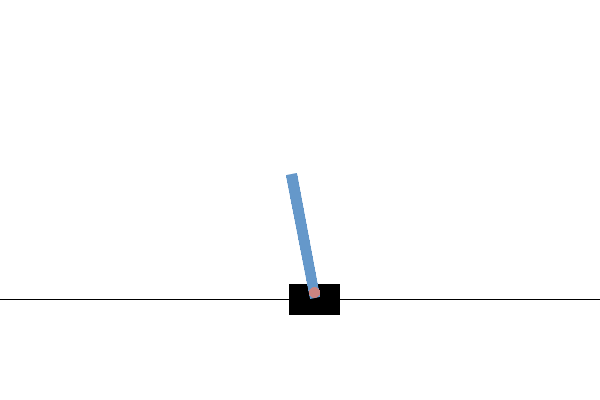


Final Results:
Episode 1: Score = 18.00
Episode 2: Score = 16.00
Episode 3: Score = 15.00
Episode 4: Score = 13.00
Episode 5: Score = 11.00


In [8]:
episodes = 5
episode_scores=[]
for episode in range(1, episodes + 1):
    obs = env.reset()
    done = False
    score = 0

    while not done:
        frame = env.render()
        # Convert RGB to BGR (OpenCV uses BGR format)
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
        # Convert to PIL image and display
        img = Image.fromarray(frame)
        clear_output(wait=True)
        display(img)

        action = env.action_space.sample()
        obs, reward, done, info, _ = env.step(action)
        score += reward

    episode_scores.append(score)
    #print(f'Episode {episode}: Score = {score:.2f}')

env.close()

# Print all episodes' scores in final output
print("\nFinal Results:")
for i, score in enumerate(episode_scores, start=1):
    print(f"Episode {i}: Score = {score:.2f}")

In [15]:
#env.reset()

In [16]:
print(env.action_space)
print(env.action_space.sample())

Discrete(2)
1


In [17]:
print(env.observation_space)
print(env.observation_space.sample())

Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)
[-2.3946254e+00 -3.0275123e+38 -2.7353138e-01  1.4121983e+38]


In [18]:
#env.reset()

In [19]:
#env.step(1)

In [20]:
#print(env.observation_space.sample())

## 3. Train an RL Model

In [4]:
#Make directories for this /Training/Logs and /Training/Saved Models
log_path = os.path.join('Training','Logs')

In [12]:
log_path

'Training\\Logs'

In [32]:
env = gym.make("CartPole-v1", render_mode="rgb_array")
env = DummyVecEnv([lambda: env])
#model = PPO("MlpPolicy", env, verbose=1, tensorboard_log = log_path)
model = PPO("MlpPolicy", env, verbose=1, tensorboard_log="log_path", device="cpu")
#MlpPolicy - Multilayer Perceptron Policy
#Stable Baselines 3 has three policy types - MlpPolicy, CnnPolicy, MultiInputPolicy

Using cpu device


In [16]:
PPO??

Init signature:
PPO(
    policy: Union[str, type[stable_baselines3.common.policies.ActorCriticPolicy]],
    env: Union[gymnasium.core.Env, ForwardRef('VecEnv'), str],
    learning_rate: Union[float, Callable[[float], float]] = 0.0003,
    n_steps: int = 2048,
    batch_size: int = 64,
    n_epochs: int = 10,
    gamma: float = 0.99,
    gae_lambda: float = 0.95,
    clip_range: Union[float, Callable[[float], float]] = 0.2,
    clip_range_vf: Union[NoneType, float, Callable[[float], float]] = None,
    normalize_advantage: bool = True,
    ent_coef: float = 0.0,
    vf_coef: float = 0.5,
    max_grad_norm: float = 0.5,
    use_sde: bool = False,
    sde_sample_freq: int = -1,
    rollout_buffer_class: Optional[type[stable_baselines3.common.buffers.RolloutBuffer]] = None,
    rollout_buffer_kwargs: Optional[dict[str, Any]] = None,
    target_kl: Optional[float] = None,
    stats_window_size: int = 100,
    tensorboard_log: Optional[str] = None,
    policy_kwargs: Optional[dict[str, Any]]

In [33]:
model.learn(total_timesteps=20000)
#Timestamps - For a simple environment lower number of timestamps is okay,
#    but must be increased for more sophisticated environment.

Logging to log_path\PPO_3
-----------------------------
| time/              |      |
|    fps             | 1705 |
|    iterations      | 1    |
|    time_elapsed    | 1    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 1069        |
|    iterations           | 2           |
|    time_elapsed         | 3           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008786551 |
|    clip_fraction        | 0.101       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.686      |
|    explained_variance   | 0.00952     |
|    learning_rate        | 0.0003      |
|    loss                 | 5.79        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0149     |
|    value_loss           | 45.1        |
-----------------------------------------
--------

## 4. Save and Reload Model

In [34]:
PPO_Path = os.path.join('Training','Saved Models','PPO_20K_Cartpole')

In [35]:
model.save(PPO_Path)

In [36]:
del model

In [63]:
PPO_Path

'Training\\Saved Models\\PPO_20K_Cartpole'

In [66]:
env = gym.make("CartPole-v1", render_mode="rgb_array")
env = DummyVecEnv([lambda: env])

In [65]:
model = PPO.load(PPO_Path, env=env, device='cpu')

## 5. Evaluation

In [76]:
env = gym.make("CartPole-v1", render_mode="rgb_array")
env = DummyVecEnv([lambda: env])
evaluate_policy(model, env, n_eval_episodes=5, render=True, return_episode_rewards=True)

C:\Users\rocha\anaconda3\envs\py310_env\lib\site-packages\stable_baselines3\common\evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


([499.0, 437.0, 500.0, 382.0, 373.0], [499, 437, 500, 382, 373])

## 6. Test Model

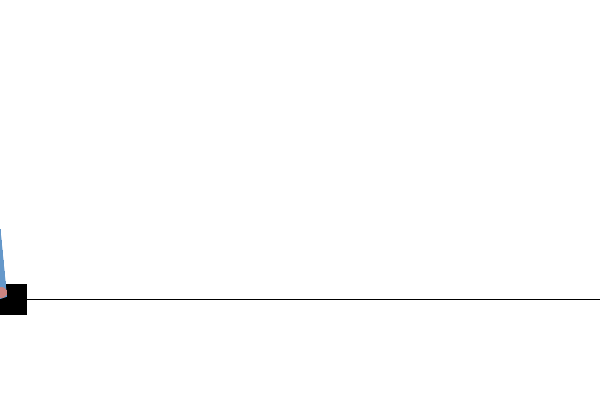


Final Results:
Episode 1: Score = 416.00
Episode 2: Score = 500.00
Episode 3: Score = 449.00
Episode 4: Score = 405.00
Episode 5: Score = 323.00


In [75]:
# Wrap the environment in a VecEnv
env = DummyVecEnv([lambda: gym.make("CartPole-v1", render_mode="rgb_array")])

episodes = 5
episode_scores = []

for episode in range(1, episodes + 1):
    state = env.reset()
    done = False
    score = 0

    while not done:
        frame = env.get_images()[0]  # Extract frame correctly
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)  # Convert RGB to BGR
        img = Image.fromarray(frame)
        clear_output(wait=True)
        display(img)

        # Select an action using the trained model
        action, _ = model.predict(state)

        # Take a step in the environment
        state, reward, done, info = env.step(action)
        score += reward
    episode_scores.append(score)

env.close()

# Print all episodes' scores
print("\nFinal Results:")
for i, score in enumerate(episode_scores, start=1):
    print(f"Episode {i}: Score = {score.item():.2f}")


In [60]:
obs = env.reset()

In [ ]:
model.predict??

In [ ]:
model.predict(obs)

In [ ]:
action,_ = model.predict(obs)

In [ ]:
env.action_space.sample()

In [ ]:
env.step(action)

## 7. Viewing Logs in Tensorboard

In [82]:
log_path = os.path.join('Training','Logs')

In [6]:
training_log_path = os.path.join(log_path, 'PPO_2')

In [7]:
training_log_path

'Training\\Logs\\PPO_2'

In [14]:
#!tensorboard --logdir = training_log_path
#(py310_env) C:\Users\rocha\Reinforcement Learning>python -m tensorboard.main --logdir=log_path\PPO_2

## 8. Adding a callback to the training Stage

In [77]:
#Need to import additional dependencies 
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnRewardThreshold

In [78]:
save_path = os.path.join("Training","Saved Models")

In [79]:
stop_callback = StopTrainingOnRewardThreshold(reward_threshold = 450, verbose = 1)
eval_callback = EvalCallback(env, 
                             callback_on_new_best = stop_callback,
                             eval_freq = 1000,
                             best_model_save_path=save_path,
                             verbose=1)

In [85]:
model = PPO('MlpPolicy', env, verbose=1, tensorboard_log=log_path, device="cpu")

Using cpu device


In [87]:
model.learn(total_timesteps=20000, callback=eval_callback)

Logging to Training\Logs\PPO_3
Eval num_timesteps=1000, episode_reward=404.60 +/- 116.96
Episode length: 404.60 +/- 116.96
---------------------------------
| eval/              |          |
|    mean_ep_length  | 405      |
|    mean_reward     | 405      |
| time/              |          |
|    total_timesteps | 1000     |
---------------------------------
Eval num_timesteps=2000, episode_reward=464.80 +/- 70.40
Episode length: 464.80 +/- 70.40
---------------------------------
| eval/              |          |
|    mean_ep_length  | 465      |
|    mean_reward     | 465      |
| time/              |          |
|    total_timesteps | 2000     |
---------------------------------
New best mean reward!
Stopping training because the mean reward 464.80  is above the threshold 450


## 9. Changing Policies

In [89]:
new_arch = [dict(pi=[128,128,128,128],vf=[128,128,128,128])]
#vf - value function

In [93]:
model = PPO('MlpPolicy', env, verbose=1, tensorboard_log=log_path, policy_kwargs={'net_arch':new_arch}, device="cpu")

Using cpu device


In [94]:
model.learn(total_timesteps=20000, callback=eval_callback)

Logging to Training\Logs\PPO_4
Eval num_timesteps=1000, episode_reward=10.00 +/- 0.00
Episode length: 10.00 +/- 0.00
---------------------------------
| eval/              |          |
|    mean_ep_length  | 10       |
|    mean_reward     | 10       |
| time/              |          |
|    total_timesteps | 1000     |
---------------------------------
Eval num_timesteps=2000, episode_reward=10.00 +/- 0.00
Episode length: 10.00 +/- 0.00
---------------------------------
| eval/              |          |
|    mean_ep_length  | 10       |
|    mean_reward     | 10       |
| time/              |          |
|    total_timesteps | 2000     |
---------------------------------
-----------------------------
| time/              |      |
|    fps             | 1451 |
|    iterations      | 1    |
|    time_elapsed    | 1    |
|    total_timesteps | 2048 |
-----------------------------
Eval num_timesteps=3000, episode_reward=90.60 +/- 19.56
Episode length: 90.60 +/- 19.56
-----------------------

## 10. Using an Alternate Algorithm

In [95]:
from stable_baselines3 import DQN

In [96]:
model = DQN('MlpPolicy', env, verbose=1, tensorboard_log=log_path)

Using cuda device


In [97]:
model.learn(total_timesteps=20000)

Logging to Training\Logs\DQN_1
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.97     |
| time/               |          |
|    episodes         | 4        |
|    fps              | 5113     |
|    time_elapsed     | 0        |
|    total_timesteps  | 64       |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.911    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 1142     |
|    time_elapsed     | 0        |
|    total_timesteps  | 187      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.542    |
|    n_updates        | 21       |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.873    |
| time/               |          |
|    episodes         | 12       |
|    fps              | 

In [100]:
# Also remember for loading
##DQN.load(...)
#instead of PPO.load(...)

## 11. Try the game yourself!

In [101]:
import pygame
from pygame.locals import K_LEFT, K_RIGHT, K_RETURN, K_ESCAPE, QUIT

# Initialize pygame
pygame.init()
screen = pygame.display.set_mode((500, 500))
pygame.display.set_caption("CartPole Game")

# Initialize the environment
env = gym.make("CartPole-v1", render_mode="human")

# Action Mapping
ACTION_LEFT = 0
ACTION_RIGHT = 1

def get_key_action():
    """Check for pressed keys and return corresponding action."""
    keys = pygame.key.get_pressed()
    if keys[K_LEFT]:
        return ACTION_LEFT
    elif keys[K_RIGHT]:
        return ACTION_RIGHT
    return None  # No action if no key is pressed

def wait_for_restart():
    """Wait for the player to press ENTER to restart the game."""
    while True:
        for event in pygame.event.get():
            if event.type == QUIT or (event.type == pygame.KEYDOWN and event.key == K_ESCAPE):
                return False  # Quit the game
            if event.type == pygame.KEYDOWN and event.key == K_RETURN:
                return True  # Restart game

# Game Loop
running = True
while running:
    obs, _ = env.reset()
    done = False
    score = 0  # Track steps survived

    while not done:
        for event in pygame.event.get():
            if event.type == QUIT or (event.type == pygame.KEYDOWN and event.key == K_ESCAPE):
                running = False
                done = True  # Quit the game

        action = get_key_action()
        if action is not None:
            obs, reward, done, _, _ = env.step(action)
            score += 1  # Increment score for each successful step
            env.render()

    print(f"Game Over! Your Score: {score}")  # Show final score after game ends

    # Wait for user to press ENTER before restarting
    if not wait_for_restart():
        running = False  # If user doesn't press ENTER, exit the game

env.close()
pygame.quit()


Game Over! Your Score: 19
Game Over! Your Score: 12
Game Over! Your Score: 28
Game Over! Your Score: 25
Game Over! Your Score: 24
Game Over! Your Score: 24
Game Over! Your Score: 39
Game Over! Your Score: 12
Game Over! Your Score: 9
Game Over! Your Score: 12
Game Over! Your Score: 19
Game Over! Your Score: 10
Game Over! Your Score: 10
Game Over! Your Score: 24
Game Over! Your Score: 9
Game Over! Your Score: 38
Game Over! Your Score: 9
Game Over! Your Score: 12
Game Over! Your Score: 10
Game Over! Your Score: 20
Game Over! Your Score: 36
Game Over! Your Score: 23
Game Over! Your Score: 10
Game Over! Your Score: 28
Game Over! Your Score: 9
Game Over! Your Score: 38
Game Over! Your Score: 29
